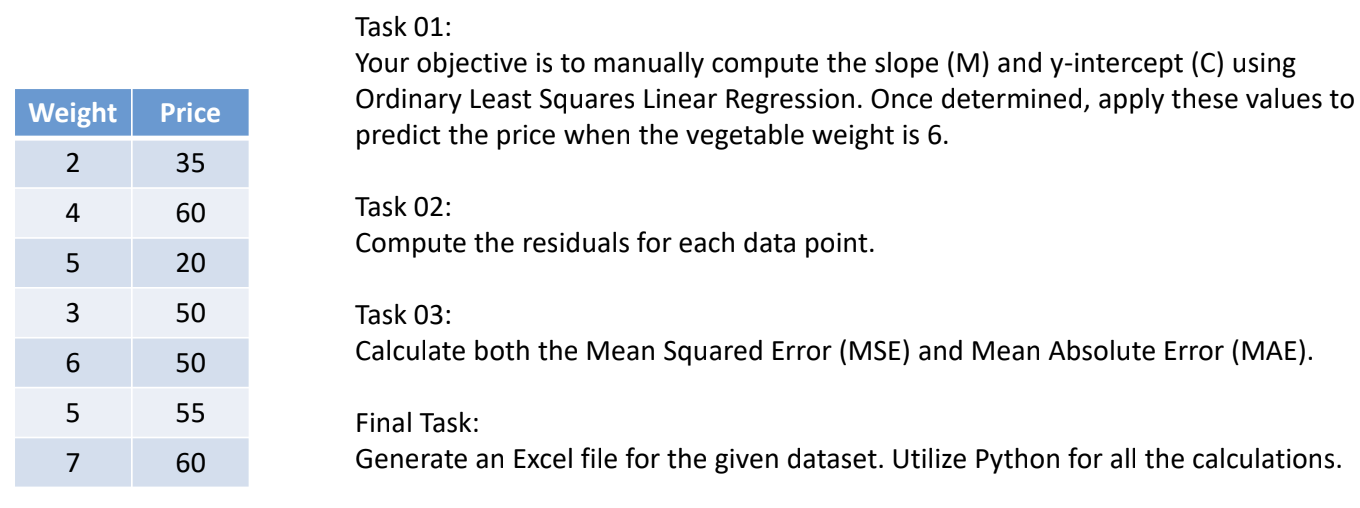

In [105]:
from utils.file_utils import load_csv_from_url

url = "https://raw.githubusercontent.com/Meshkat-Shadik/MachineLearning/refs/heads/master/datasets/homedata.csv?token=GHSAT0AAAAAACYHIFXHFI6P5O6WXCRZN2E2Z3IM36A"
local_path = "datasets/homedata.csv"

dataset = load_csv_from_url(url, local_path)
print(dataset.head())
print(dataset.shape)

CSV file downloaded and saved locally at: datasets/homedata.csv
           x          y
0  48.955889  60.723602
1  44.687196  82.892504
2  60.297327  97.379897
3  45.618644  48.847153
4  38.816818  56.877213
(99, 2)


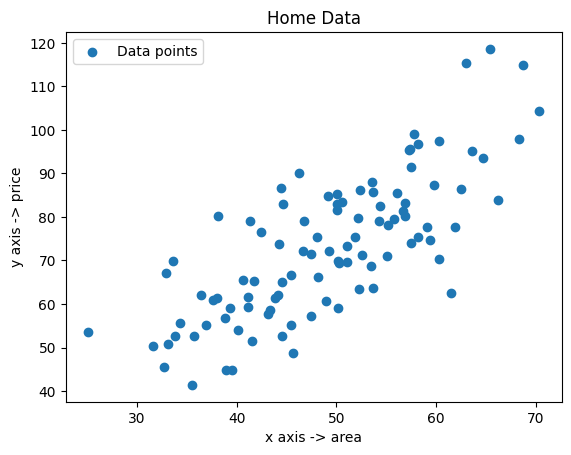

In [106]:
x = dataset.x
y = dataset.y

#plotting the data
import matplotlib.pyplot as plt
plt.scatter(x, y)
plt.title("Home Data")
plt.xlabel("x axis -> area")
plt.ylabel("y axis -> price")

plt.legend(["Data points"])
plt.show()


find the best fit line using linear regression (y = mx + c) by hand

we need to find the value of m and c
The formula for the slope \( m \) in linear regression using means is:

$$
m = \frac{\sum{(x_i - \bar{x})(y_i - \bar{y})}}{\sum{(x_i - \bar{x})^2}}
$$

In [107]:
import numpy as np

xMean = np.sum(x)/len(x)
yMean = np.sum(y)/len(y)

# loop through each data point and calculate (x-xMean) and (y-yMean)
xMeanDiff = x - xMean
yMeanDiff = y - yMean

sumXYMeanDiff = np.sum(xMeanDiff * yMeanDiff)
sumXYMeanDiffSquare = np.sum(xMeanDiff**2)

# calculate the slope
slope = sumXYMeanDiff/sumXYMeanDiffSquare

print(f"Slope: {slope}")


Slope: 1.287357369949428


In [108]:
# calculate the intercept
intercept = yMean - slope*xMean
print(f"Intercept: {intercept}")

Intercept: 9.908606193483159


In [109]:
## model
# yPred = slope*x + intercept

## take input from user and predict the price
area = float(input("Enter the area of the house: "))
price = slope*area + intercept
print(f"Price of the house: {price} for area: {area}")

Price of the house: 88.43740576039826 for area: 61.0


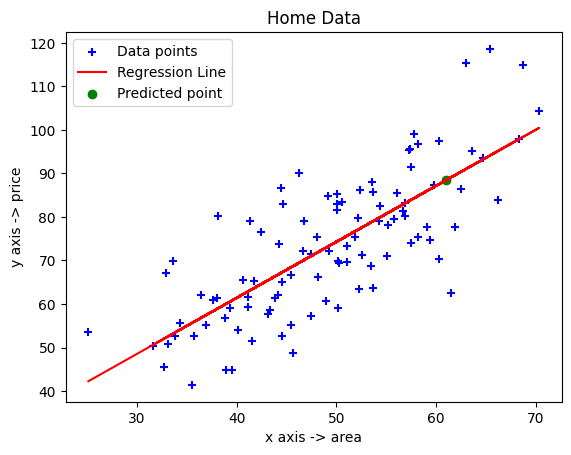

In [110]:
# plot the data points and the line
plt.scatter(x, y, color='blue', marker='+')
plt.plot(x, slope*x + intercept, color='red')
plt.title("Home Data")
plt.xlabel("x axis -> area")
plt.ylabel("y axis -> price")

#plot the area entered by the user
plt.scatter(area, price, color='green')

plt.legend(["Data points","Regression Line",  "Predicted point"])
plt.show()


In [111]:
# residuals = y - yPred
yPred = slope*x + intercept
residuals = y - yPred

# add predicted values to the dataset
dataset['yPred'] = yPred
print(dataset.head())

# add residuals to the dataset
dataset['residuals'] = residuals
print(dataset.head())



           x          y      yPred
0  48.955889  60.723602  72.932330
1  44.687196  82.892504  67.436998
2  60.297327  97.379897  87.532814
3  45.618644  48.847153  68.636103
4  38.816818  56.877213  59.879722
           x          y      yPred  residuals
0  48.955889  60.723602  72.932330 -12.208728
1  44.687196  82.892504  67.436998  15.455506
2  60.297327  97.379897  87.532814   9.847083
3  45.618644  48.847153  68.636103 -19.788950
4  38.816818  56.877213  59.879722  -3.002509


$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

$$
\text{MAE} = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i|
$$

In [112]:
# find the errors
# mean squared error (MSE)
mse = np.sum(residuals**2)/len(y)
print(f"Mean Squared Error: {mse}")


# mean absolute error (MAE)
mae = np.sum(np.abs(residuals))/len(y)
print(f"Mean Absolute Error: {mae}")




Mean Squared Error: 107.47043699284819
Mean Absolute Error: 8.219591371382924


In [113]:
from utils.file_utils import make_path

# export the dataset with residuals
pathToSave = make_path("output/homedata_with_residuals.csv")
dataset.to_csv(pathToSave, index=False)
print("Dataset with residuals saved successfully")


Dataset with residuals saved successfully
